<font color='#54555A' size='5'>**Having visibility on CO2 emissions related to industrial activities** </font>

<font color='#6BA9DA' size='3'>1 - Data Science Objective</font>

Forecasting CO2 Emissions for the 23 target refinerees

# Importaions

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install xlrd

In [56]:
import pandas as pd
import numpy as np
from numpy import isnan
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br><br><font color='#6BA9DA' size='6'>Step 1 - Data Understanding:</font>

## Dataset 1 :  OdysseyFactories 

In [16]:
# Target factories data
file_path = r'C:\Users\HP\Downloads\OdysseyFactories.csv'

In [25]:
test = pd.read_csv(file_path)

In [27]:
test

,REGISTRY_CODE,IDENTIFIER_IN_REG,ADD ADRESS,Latitude,Longitude,INSTALLATION_NAME,INSTALLATION_IDENTIFIER,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,DE,55 - Anlagenkonto,Bahnhofstraße 82,"52.4166848,",10.17579,AVISTA OIL Deutschland GmbH,37,21665,24204,28481,...,33622,33548,33270,34415,38883,42238,43711,42213,41130,42690
1,DE,24 - Anlagenkonto,Industriegebiet Süd,53.9049178,9.0771825,Destillation und Nebenanlagen Brunsbüttel,6,35828,35155,36387,...,33842,36083,34156,35842,35823,34804,30894,25625,32134,32399
2,DE,LSFO-Anlage HES Wilhelmshaven,Raffineriestraße 1,53.6082551,8.0856066,LSFO-Anlage HES Wilhelmshaven,212260,40750,40603,62235,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,DE,38 - Anlagenkonto,Maienweg 1,51.28189,11.9835991,Mineralölraffinerie Leuna,20,1692681,1909041,1600337,...,1788324,2066947,2044487,1873500,2119072,1973301,1976029,2014908,2088240,1852251
4,DE,23 - Anlagenkonto,Haiminger Straße 1,48.1974495,12.8373849,Mineralölverarbeitung Burghausen,5,1071986,960452,1108174,...,1106000,1098161,1107526,975544,1088405,1085791,1101629,1116789,1108379,1154282
5,DE,37 - Anlagenkonto,Passower Chaussee 111,53.0932757,14.2287038,PCK Raffinerie Glocke Schwedt,19,3123277,3600518,3480163,...,3842978,3766493,4015772,3714705,3601523,1520052,1583685,1501147,1642259,1548738
6,DE,21 - Anlagenkonto,Ruhr Oel GmbH,51.59769,"7.0228862,866",RUHR OEL GmbH - Werk Horst - CO2-Glocke,3,899437,1105424,1016652,...,1116050,1120628,1162480,1173920,1190795,989751,1096475,1107916,1067408,1091147
7,DE,22 - Anlagenkonto,Ruhr Oel GmbH,51.596935,7.0258224,RUHR OEL GmbH - Werk Scholven - CO2-Glocke,4,2679170,3078302,3010072,...,3318353,3207666,3241338,3246161,3546430,3694963,3730978,3684846,3540414,3545345
8,DE,46 - Anlagenkonto,Moorburger Straße 16,53.4770282,9.9491699,Raffinerie,28,606381,764789,739644,...,764936,750734,770005,736710,650931,750597,649417,736900,723065,699404
9,DE,Anlagenkonto Godorf (50 - Anlagenkonto),Suhrenkamp 71-77,50.8536743,6.9781858,Raffinerie Godorf,32,1256137,1421839,1446356,...,1463615,1478860,1425425,1393061,1381694,822195,825304,870453,908303,1002904


In [28]:
test.shape

(21, 23)

## Dataset 2 : verified

In [39]:
# total data
file_path2 = r'C:\Users\HP\Downloads\verified.csv'

In [41]:
train = pd.read_csv(file_path2, low_memory=False)

In [74]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,Excluded,21,-1,-1,-1,-1
1,201836.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,31,-1,-1,-1,-1
2,201564.0,10,Excluded,Excluded,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,297,-1,-1,-1,-1


In [75]:
train.shape

(14828, 22)

<font color='#6BA9DA' size='4'>- Target Variable:</font>

My target variable is **CO2 Emissions in the 23 target refinerees for the year 2023** as we are able to validate these values.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INSTALLATION_IDENTIFIER     14828 non-null  float64
 1   MAIN_ACTIVITY_TYPE_CODE     14828 non-null  int64  
 2   VERIFIED_EMISSIONS_2023     14828 non-null  object 
 3   CH_VERIFIED_EMISSIONS_2023  14828 non-null  object 
 4   VERIFIED_EMISSIONS_2022     14828 non-null  object 
 5   CH_VERIFIED_EMISSIONS_2022  14828 non-null  object 
 6   VERIFIED_EMISSIONS_2021     14828 non-null  object 
 7   CH_VERIFIED_EMISSIONS_2021  14828 non-null  object 
 8   VERIFIED_EMISSIONS_2020     14828 non-null  object 
 9   CH_VERIFIED_EMISSIONS_2020  14828 non-null  object 
 10  VERIFIED_EMISSIONS_2019     14828 non-null  object 
 11  VERIFIED_EMISSIONS_2018     14828 non-null  object 
 12  VERIFIED_EMISSIONS_2017     14828 non-null  object 
 13  VERIFIED_EMISSIONS_2016     148

In [89]:
data_types = train.dtypes

# Categorize variables based on data types
numerical_vars = data_types[data_types != 'object'].index.tolist()
categorical_vars = data_types[data_types == 'object'].index.tolist()
time_vars = data_types[data_types == 'datetime64[ns]'].index.tolist()

print("Numerical Variables:", numerical_vars)
print('\n')

print("Categorical Variables:", categorical_vars)
print('\n')

print("Time-based Variables:", time_vars)

Numerical Variables: ['INSTALLATION_IDENTIFIER', 'MAIN_ACTIVITY_TYPE_CODE', 'VERIFIED_EMISSIONS_2012', 'VERIFIED_EMISSIONS_2011', 'VERIFIED_EMISSIONS_2010', 'VERIFIED_EMISSIONS_2009', 'VERIFIED_EMISSIONS_2008']


Categorical Variables: ['VERIFIED_EMISSIONS_2023', 'CH_VERIFIED_EMISSIONS_2023', 'VERIFIED_EMISSIONS_2022', 'CH_VERIFIED_EMISSIONS_2022', 'VERIFIED_EMISSIONS_2021', 'CH_VERIFIED_EMISSIONS_2021', 'VERIFIED_EMISSIONS_2020', 'CH_VERIFIED_EMISSIONS_2020', 'VERIFIED_EMISSIONS_2019', 'VERIFIED_EMISSIONS_2018', 'VERIFIED_EMISSIONS_2017', 'VERIFIED_EMISSIONS_2016', 'VERIFIED_EMISSIONS_2015', 'VERIFIED_EMISSIONS_2014', 'VERIFIED_EMISSIONS_2013']


Time-based Variables: []


In [54]:
activity_counts = train['MAIN_ACTIVITY_TYPE_CODE'].value_counts()

plt.figure(figsize=(15, 15))  # Adjust figure size if necessary
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MAIN_ACTIVITY_TYPE_CODE', pad=50)  # Adjust pad as needed (default is 6)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [51]:
# Count rows where MAIN_ACTIVITY_TYPE_COD equals 21
count_rows = len(train[train['MAIN_ACTIVITY_TYPE_CODE'] == 21])

print(f"Number of rows where MAIN_ACTIVITY_TYPE_CODE is equal to 21: {count_rows}")

Number of rows where MAIN_ACTIVITY_TYPE_CODE is equal to 21: 137


**==> It is crucial to note that our target refinerees are of activity type 21** and that 0.9% of our data are refinerees similar to our target.

<br><br><font color='#6BA9DA' size='4'>- Variable Significance</font>

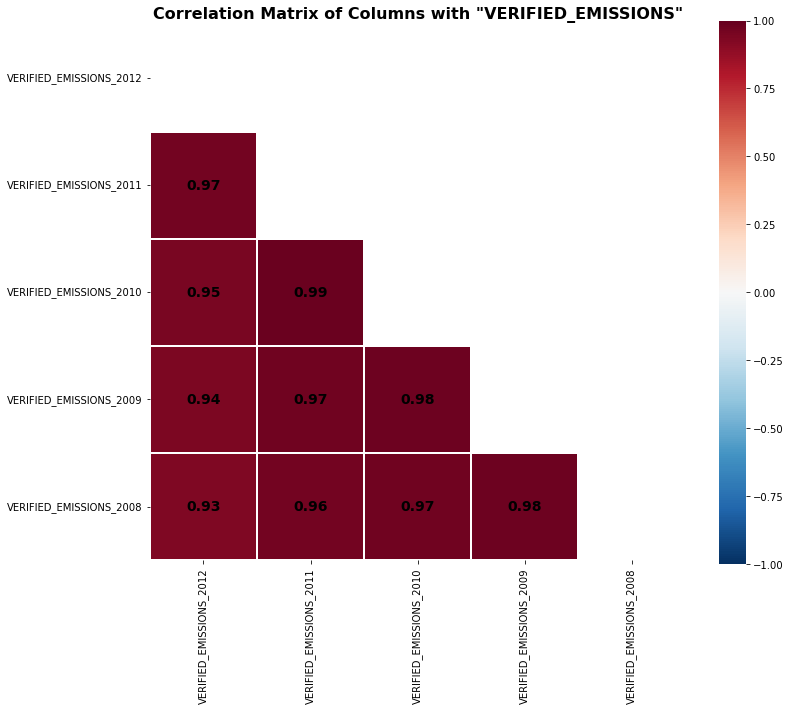

In [87]:
# Filter columns that include 'VERIFIED_EMISSIONS' in their names
columns_of_interest = [col for col in train.columns if 'VERIFIED_EMISSIONS' in col]
train_filtered = train[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = train_filtered.corr().round(3)

# Set up the heatmap
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Customize the heatmap with larger annotation text
sns.heatmap(corr_matrix,
            linewidths=0.1,
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linecolor='white',
            cmap=colormap,
            square=True,
            fmt='.2g',
            annot_kws={"size": 14, "weight": "bold", "color": "black"},  # Adjust font size, weight, and color
            mask=mask)

plt.title('Correlation Matrix of Columns with "VERIFIED_EMISSIONS"', fontsize=16, fontweight='bold')  # Optional title
plt.show()

As you can seen, only data from 2008 till 2012 is displayed as the rest of the data isn't numerical, we'll get to that in the data preparation phase.

<font color='#54555A' size='5'>**Data Preparation** </font>

In [90]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,Excluded,21,-1,-1,-1,-1
1,201836.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,31,-1,-1,-1,-1
2,201564.0,10,Excluded,Excluded,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,297,-1,-1,-1,-1


In [94]:
# Replace 'Excluded' with -1 in the entire DataFrame
train.replace('Excluded', -1, inplace=True)

In [95]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,21,-1,-1,-1,-1
1,201836.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,31,-1,-1,-1,-1
2,201564.0,10,-1,-1,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,297,-1,-1,-1,-1


<br><br><font color='#6BA9DA' size='4'>- Focusing on the activity type of our target refinerees</font>

In [111]:
# Filter the dataset where MAIN_ACTIVITY_TYPE_CODE == 21
target_refinerees = train[train['MAIN_ACTIVITY_TYPE_CODE'] == 21]

In [97]:
target_refinerees.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26.0,21,2579589,-1,2255065,-1,2749644,-1,2731772,-1,...,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176.0,21,2182916,-1,1919317,-1,2196298,-1,1905989,-1,...,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209.0,21,10349,-1,15673,-1,39878,-1,43978,-1,...,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127.0,21,3282539,-1,3712276,-1,3788472,-1,3627295,-1,...,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126.0,21,-1,-1,10515,-1,14890,-1,215021,-1,...,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


In [98]:
target_refinerees.shape

(137, 22)

In [99]:
target_refinerees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 151 to 14759
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INSTALLATION_IDENTIFIER     137 non-null    float64
 1   MAIN_ACTIVITY_TYPE_CODE     137 non-null    int64  
 2   VERIFIED_EMISSIONS_2023     137 non-null    object 
 3   CH_VERIFIED_EMISSIONS_2023  137 non-null    object 
 4   VERIFIED_EMISSIONS_2022     137 non-null    object 
 5   CH_VERIFIED_EMISSIONS_2022  137 non-null    object 
 6   VERIFIED_EMISSIONS_2021     137 non-null    object 
 7   CH_VERIFIED_EMISSIONS_2021  137 non-null    object 
 8   VERIFIED_EMISSIONS_2020     137 non-null    object 
 9   CH_VERIFIED_EMISSIONS_2020  137 non-null    object 
 10  VERIFIED_EMISSIONS_2019     137 non-null    object 
 11  VERIFIED_EMISSIONS_2018     137 non-null    object 
 12  VERIFIED_EMISSIONS_2017     137 non-null    object 
 13  VERIFIED_EMISSIONS_2016     137

In [112]:
# Convert all columns to integer type
target_refinerees = target_refinerees.astype(int)

In [101]:
target_refinerees.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26,21,2579589,-1,2255065,-1,2749644,-1,2731772,-1,...,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176,21,2182916,-1,1919317,-1,2196298,-1,1905989,-1,...,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209,21,10349,-1,15673,-1,39878,-1,43978,-1,...,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127,21,3282539,-1,3712276,-1,3788472,-1,3627295,-1,...,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126,21,-1,-1,10515,-1,14890,-1,215021,-1,...,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


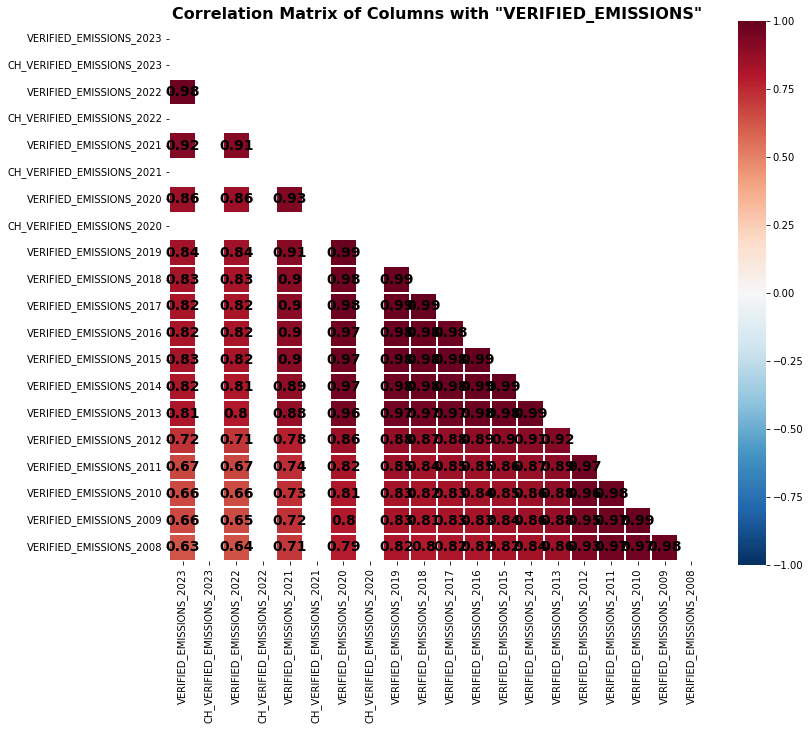

In [102]:
# Filter columns that include 'VERIFIED_EMISSIONS' in their names
columns_of_interest = [col for col in target_refinerees.columns if 'VERIFIED_EMISSIONS' in col]
train_filtered = target_refinerees[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = train_filtered.corr().round(3)

# Set up the heatmap
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Customize the heatmap with larger annotation text
sns.heatmap(corr_matrix,
            linewidths=0.1,
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linecolor='white',
            cmap=colormap,
            square=True,
            fmt='.2g',
            annot_kws={"size": 14, "weight": "bold", "color": "black"},  # Adjust font size, weight, and color
            mask=mask)

plt.title('Correlation Matrix of Columns with "VERIFIED_EMISSIONS"', fontsize=16, fontweight='bold')  # Optional title
plt.show()

==> As we can see, emissions from all years are very correlated to 2023's emissions. However **columns starting with 'CH' are NOT correlated.**

In [113]:
# Identify columns to drop (starting with 'CH')
columns_to_drop = [col for col in target_refinerees.columns if col.startswith('CH')]

# Drop identified columns
target_refinerees.drop(columns=columns_to_drop, inplace=True)

In [114]:
# Drop the column 'MAIN_ACTIVITY_TYPE_CODE'
target_refinerees.drop(columns='MAIN_ACTIVITY_TYPE_CODE', inplace=True)
target_refinerees.head()

,INSTALLATION_IDENTIFIER,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26,2579589,2255065,2749644,2731772,2791040,2824369,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176,2182916,1919317,2196298,1905989,2093011,1994945,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209,10349,15673,39878,43978,46312,46383,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127,3282539,3712276,3788472,3627295,4004998,3643252,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126,-1,10515,14890,215021,471834,457012,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


<br><br><font color='#6BA9DA' size='4'>- Handling Missing Values</font>

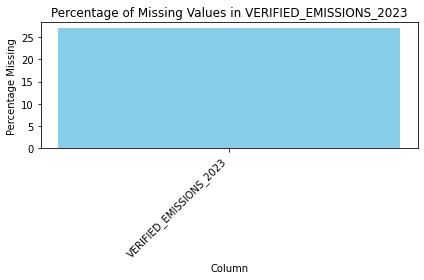

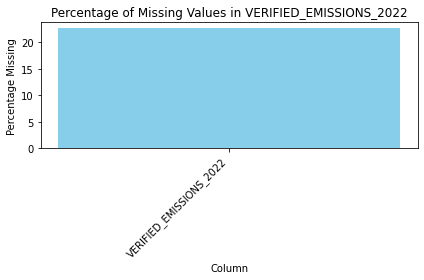

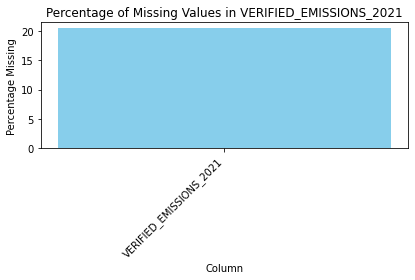

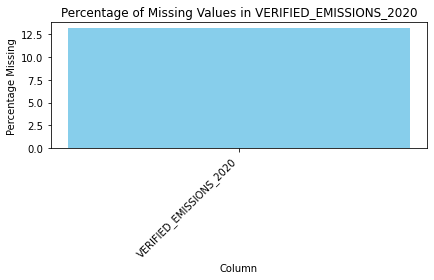

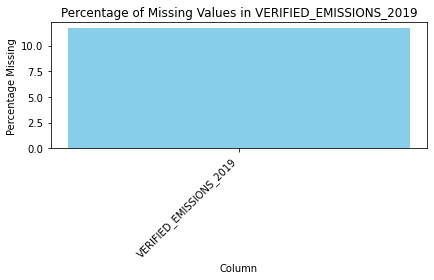

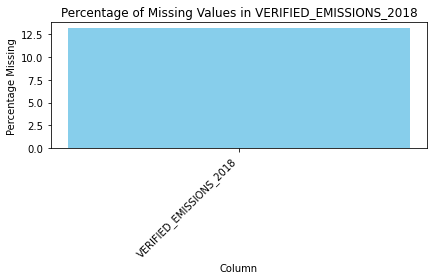

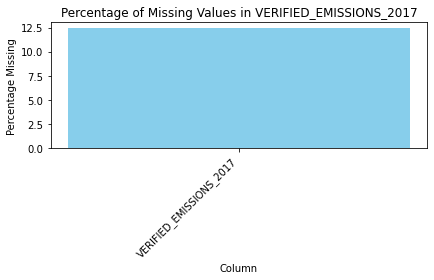

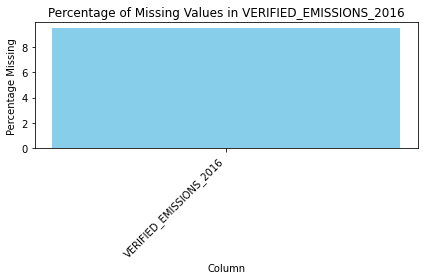

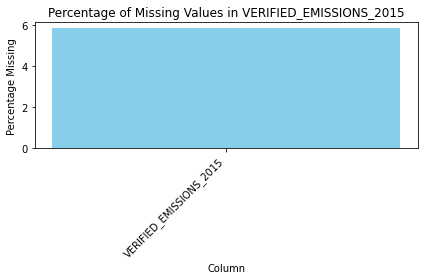

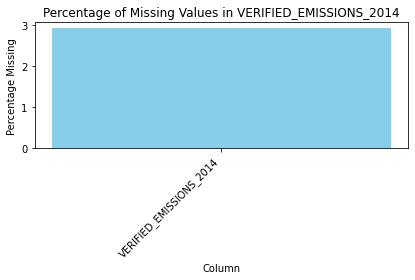

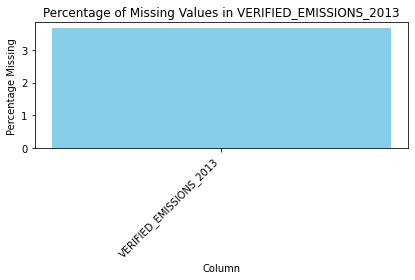

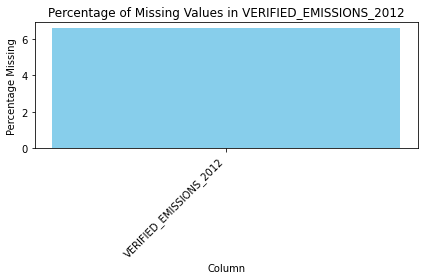

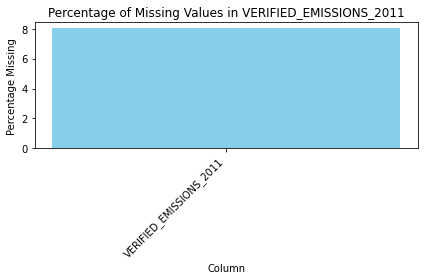

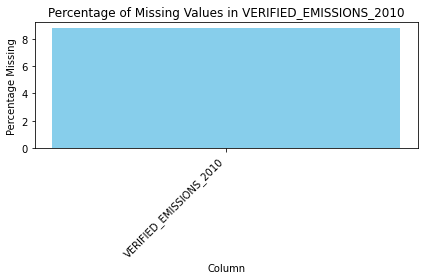

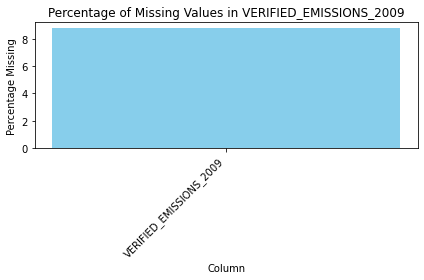

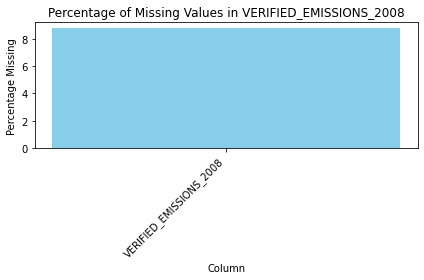

In [119]:
for column in target_refinerees.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (target_refinerees[column] == -1).sum() / len(target_refinerees) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

==> As depicted in the plots above, it is evident that over time, the visibility of CO2 emissions decreases as the number of missing values increases across the years

In [121]:
# Create a new dataset 'targets' excluding the first column
targets = target_refinerees.iloc[:, 1:]

In [127]:
targets.head()

,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,2579589,2255065,2749644,2731772,2791040,2824369,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,2182916,1919317,2196298,1905989,2093011,1994945,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,10349,15673,39878,43978,46312,46383,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,3282539,3712276,3788472,3627295,4004998,3643252,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,-1,10515,14890,215021,471834,457012,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


In [130]:
#re organize columns
targets = targets[targets.columns[::-1]]


In [131]:
targets.head()

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,-1


In [152]:
#calculate number of lines where there are consecutive -1 values

def find_consecutive_minus1_rows(df):
    rows_with_consecutive_minus1 = []
    for index, row in df.iterrows():
        consecutive_count = 0
        for value in row:
            if (value == -1)| (value == 0):
                consecutive_count += 1
            else:
                break
        if consecutive_count > 0:
            rows_with_consecutive_minus1.append((index, consecutive_count))
    return rows_with_consecutive_minus1

# Find rows with consecutive -1 values and their counts
consecutive_minus1_rows = find_consecutive_minus1_rows(targets)

# Display rows with consecutive -1 values and their counts
print("Rows with consecutive missing values:")
for row_index, consecutive_count in consecutive_minus1_rows:
    print(f"Row {row_index}: {consecutive_count} consecutive -missing values")

# Optionally, you can also create a new DataFrame with these rows:
rows_df = targets.loc[[row_index for row_index, _ in consecutive_minus1_rows]]

# Display the DataFrame with rows containing consecutive -1 values
print("\nDataFrame with rows containing consecutive missing values:")
rows_df

Rows with consecutive missing values:
Row 728: 4 consecutive -missing values
Row 731: 17 consecutive -missing values
Row 2765: 11 consecutive -missing values
Row 2854: 6 consecutive -missing values
Row 3909: 5 consecutive -missing values
Row 3918: 6 consecutive -missing values
Row 3940: 3 consecutive -missing values
Row 5403: 8 consecutive -missing values
Row 6666: 13 consecutive -missing values
Row 7782: 4 consecutive -missing values
Row 9366: 5 consecutive -missing values
Row 9367: 5 consecutive -missing values
Row 11667: 5 consecutive -missing values
Row 13626: 17 consecutive -missing values

DataFrame with rows containing consecutive missing values:


,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
728,-1,-1,-1,-1,1937,2380,3609,4515,3238,3752,1208,0,-1,-1,-1,-1,4
731,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,0
2765,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3048,50586,62235,40603,40750,11
2854,-1,-1,-1,-1,-1,-1,42539,27216,-1,-1,-1,-1,-1,-1,-1,-1,6
3909,-1,-1,-1,-1,-1,467858,593400,732132,651704,814664,837752,841976,797245,788760,905078,975506,5
3918,-1,-1,-1,-1,-1,-1,6764,16050,48825,58794,59297,59368,49536,62861,61497,231542,6
3940,-1,-1,-1,200185,163425,155160,278674,428636,565541,593584,666794,708827,715406,697209,597144,721077,3
5403,-1,-1,-1,-1,-1,-1,-1,-1,79744,260072,263217,141412,191513,149992,158383,239472,8
6666,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,228,900,327,11
7782,-1,-1,-1,-1,52355,77189,59068,53814,1642,-1,-1,-1,-1,-1,-1,-1,4


In [156]:
rows_df.replace([-1, 0], np.nan, inplace=True)
rows_df

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
728,NaN,NaN,NaN,NaN,1937.0,2380.0,3609.0,4515.0,3238.0,3752.0,1208.0,NaN,NaN,NaN,NaN,NaN,4.0
731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3048.0,50586.0,62235.0,40603.0,40750.0,11.0
2854,NaN,NaN,NaN,NaN,NaN,NaN,42539.0,27216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3909,NaN,NaN,NaN,NaN,NaN,467858.0,593400.0,732132.0,651704.0,814664.0,837752.0,841976.0,797245.0,788760.0,905078.0,975506.0,5.0
3918,NaN,NaN,NaN,NaN,NaN,NaN,6764.0,16050.0,48825.0,58794.0,59297.0,59368.0,49536.0,62861.0,61497.0,231542.0,6.0
3940,NaN,NaN,NaN,200185.0,163425.0,155160.0,278674.0,428636.0,565541.0,593584.0,666794.0,708827.0,715406.0,697209.0,597144.0,721077.0,3.0
5403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79744.0,260072.0,263217.0,141412.0,191513.0,149992.0,158383.0,239472.0,8.0
6666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,900.0,327.0,11.0
7782,NaN,NaN,NaN,NaN,52355.0,77189.0,59068.0,53814.0,1642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [160]:
rowss=rows_df

In [158]:
from scipy.spatial.distance import cdist

In [163]:
# Step 1: Identify rows with missing values in rows_df
missing_rows = rows_df.isnull().any(axis=1)

# Step 2: Ensure columns are aligned and numeric
common_columns = list(set(rows_df.columns).intersection(train.columns))
rows_df_subset = rows_df[common_columns].astype(float)  # Convert to float if necessary
train_subset = train[common_columns].astype(float)      # Convert to float if necessary

# Step 3: Define a function to find the most similar row in train
def find_similar_row(row, train_df):
    distances = cdist([row.values], train_df.dropna().values, metric='euclidean')
    min_index = distances.argmin()
    return train_df.iloc[min_index]

# Step 4: Replace missing rows in rows_df with similar rows from train
for index, row in rows_df_subset[missing_rows].iterrows():
    similar_row = find_similar_row(row, train_subset)
    rows_df.loc[index] = similar_row

print("rows_df after replacement:")
rows_df

rows_df after replacement:


,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
728,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
731,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2765,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2854,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3909,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3918,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3940,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
5403,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
6666,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
7782,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN


==>This proves that the only data similar to lines with missing values are completely missing values' lines. In this case, we'll drop this subset although our data is very small.

In [150]:
# Step 1: Exclude rows with -1 values
filtered_rows_df = rows_df.mask((rows_df == -1) | (rows_df == 0))

# Step 2: Calculate percentage difference
def calculate_avg_percent_diff(row):
    diffs = []
    for i in range(len(row) - 1):
        if not np.isnan(row[i]) and not np.isnan(row[i + 1]):
            diff_percent = ((row[i + 1] - row[i]) / row[i]) * 100
            diffs.append(diff_percent)
    if diffs:
        return np.mean(diffs)
    else:
        return np.nan

# Apply function row-wise to calculate average percentage difference
avg_percent_diff = filtered_rows_df.apply(calculate_avg_percent_diff, axis=1)

# Step 3: Compute the overall average of percentage differences
overall_avg_percent_diff = avg_percent_diff.mean()

# Display results
print("Average percentage difference for each row:")
print(avg_percent_diff)
print("\nOverall average percentage difference:", overall_avg_percent_diff)

Average percentage difference for each row:
728        3.233273
2765     289.660848
2854     -36.021063
3909      -1.479770
3918      54.756499
3940       5.409173
5403      18.951459
6666      44.811363
7782     -20.471465
9366     -27.560202
9367     -11.740780
11667     84.939720
dtype: float64

Overall average percentage difference: 33.707421248243534


In [141]:
# Create a new dataset that is the difference between 'data' and 'da'
new = targets.drop(rows_df.index)

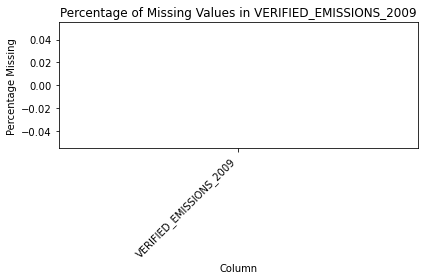

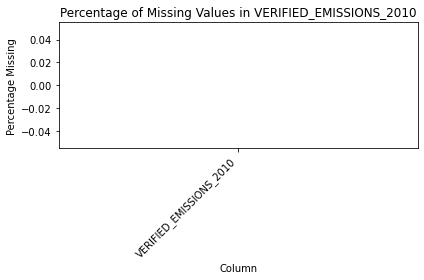

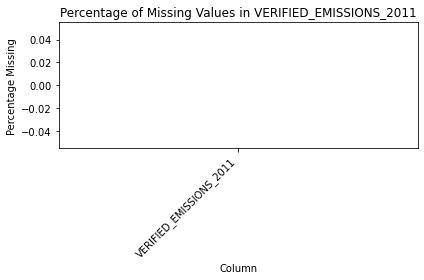

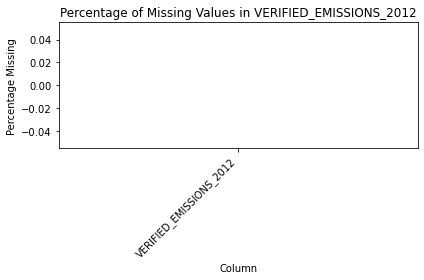

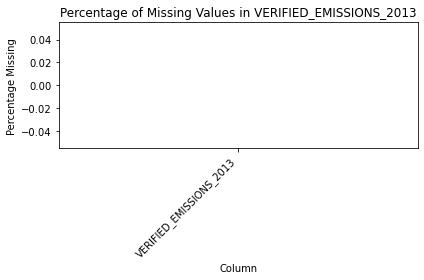

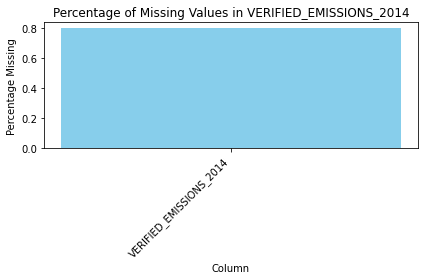

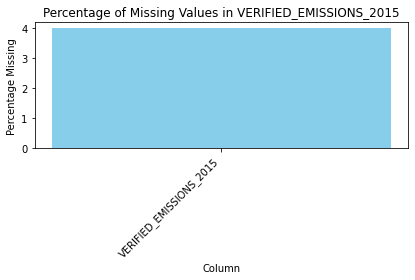

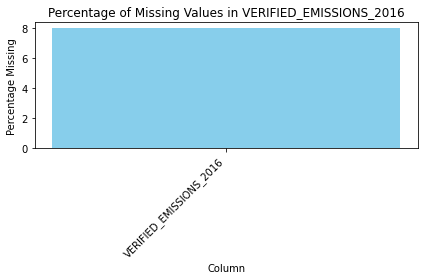

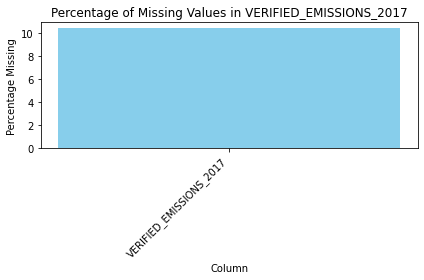

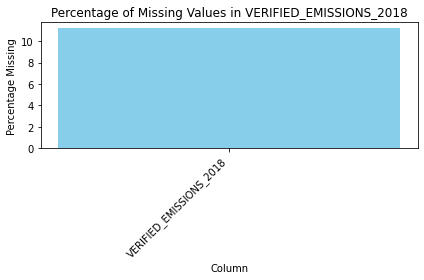

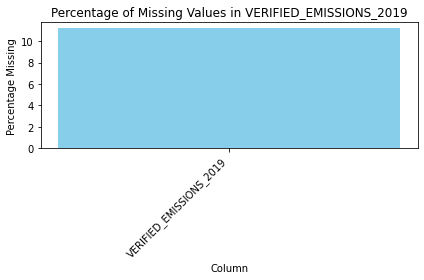

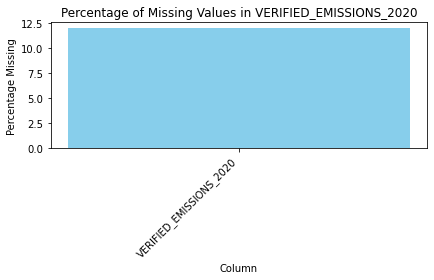

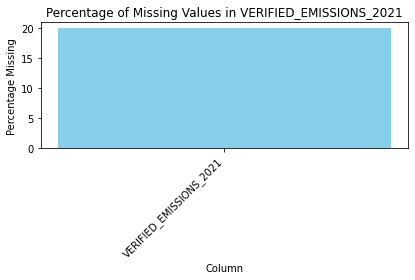

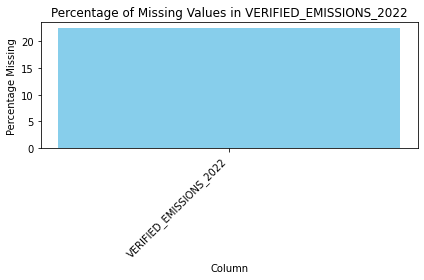

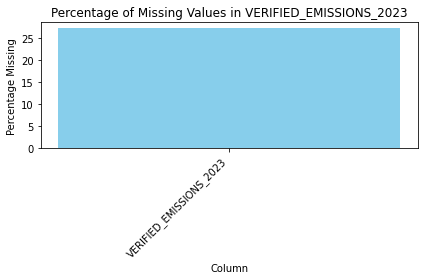

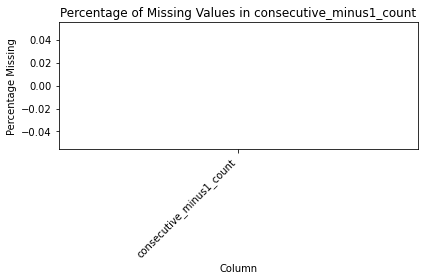

In [142]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == -1).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [144]:
# Iterate through each pair of consecutive columns
for i in range(1, len(new.columns)):
    current_col = targets.columns[i]
    next_col = new.columns[i + 1] if i + 1 < len(new.columns) else None
    
    if next_col is not None:
        # Identify rows where current_col has missing values (-1)
        missing_indices = new[current_col] == -1
        
        # Impute missing values (-1) in current_col with values from next_col
        new.loc[missing_indices, current_col] = new.loc[missing_indices, next_col]

# Replace remaining -1 values with NaN if needed (optional)
new.replace(-1, np.nan, inplace=True)

# Display the updated dataset
new

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186.0,2804050.0,2784461.0,2738604.0,2824369.0,2791040.0,2731772.0,2749644.0,2255065.0,2579589,0
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865.0,1957465.0,1932514.0,1883919.0,1994945.0,2093011.0,1905989.0,2196298.0,1919317.0,2182916,0
542,56029,59719,44310,42578,40141,34018,36192.0,35415.0,42796.0,39697.0,46383.0,46312.0,43978.0,39878.0,15673.0,10349,0
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037.0,3780955.0,3719356.0,3676934.0,3643252.0,4004998.0,3627295.0,3788472.0,3712276.0,3282539,0
635,525496,525550,521974,539452,300749,537352,498625.0,493884.0,388655.0,451446.0,457012.0,471834.0,215021.0,14890.0,10515.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14164,157962,141734,159454,124254,122393,133652,137441.0,127611.0,141499.0,147379.0,145135.0,116474.0,106649.0,117388.0,112477.0,100999,0
14326,539306,496876,557207,473110,515636,510343,491235.0,532820.0,503504.0,461299.0,536000.0,570427.0,511723.0,526277.0,587105.0,479781,0
14327,1769903,1777932,1672852,1735310,1823198,1457376,1639901.0,1709050.0,1576765.0,1698054.0,1768630.0,1220342.0,1186464.0,1594959.0,1383877.0,1567625,0
14423,522275,492838,537926,485835,533969,470446,489173.0,465990.0,535225.0,522459.0,547101.0,456632.0,500033.0,506027.0,568991.0,477527,0


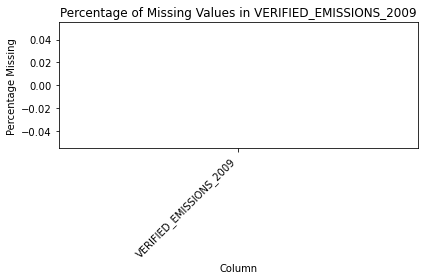

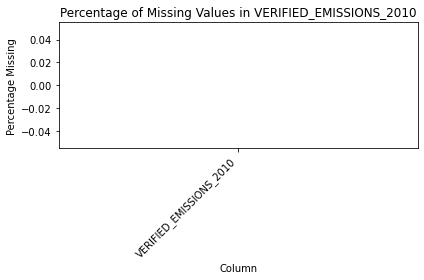

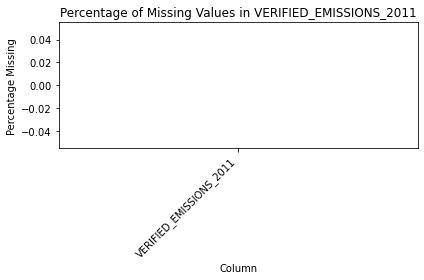

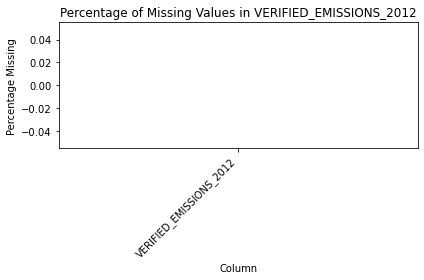

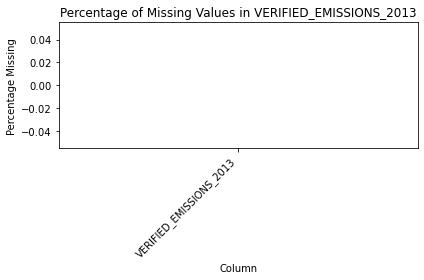

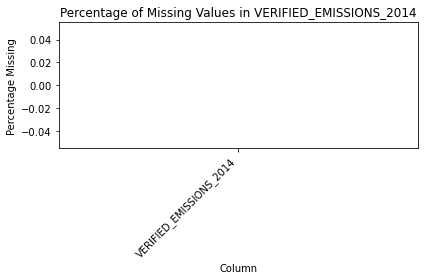

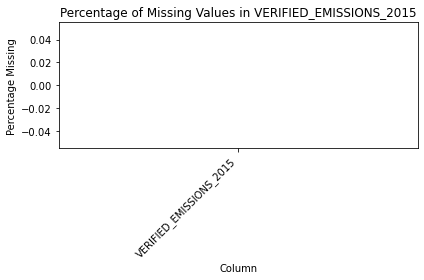

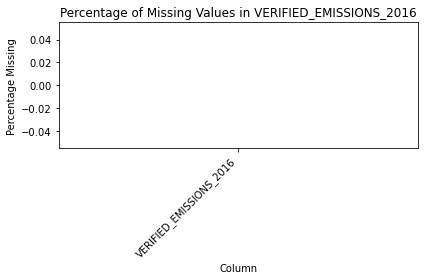

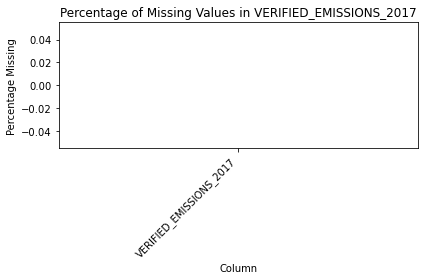

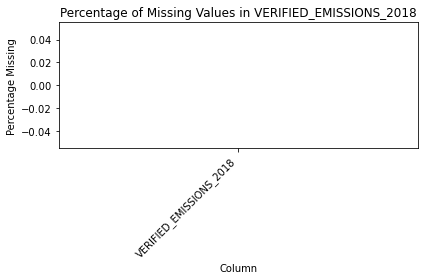

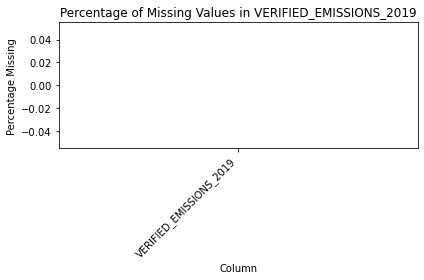

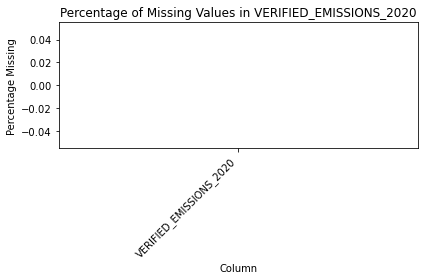

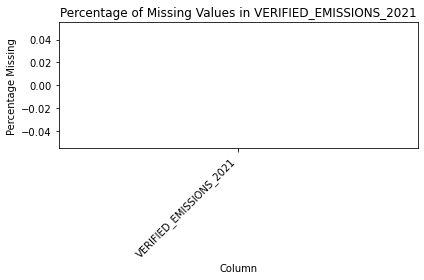

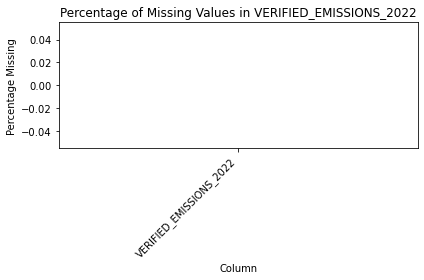

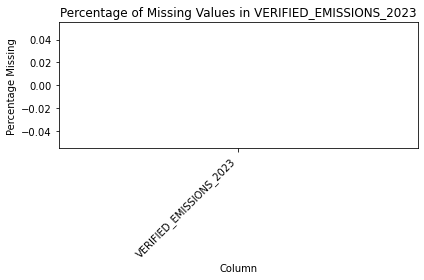

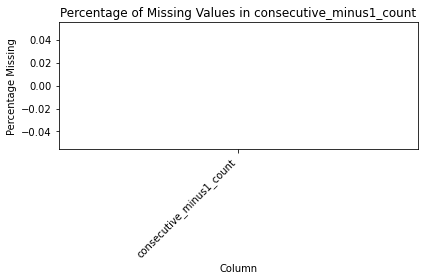

In [145]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == -1).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

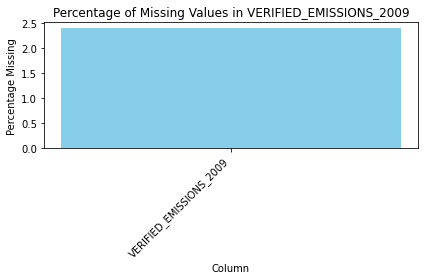

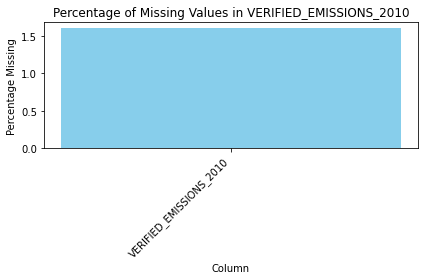

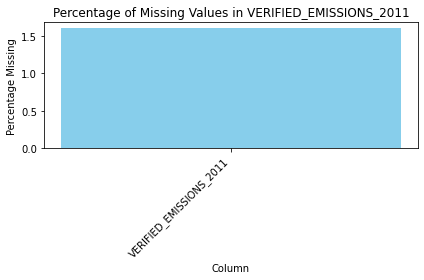

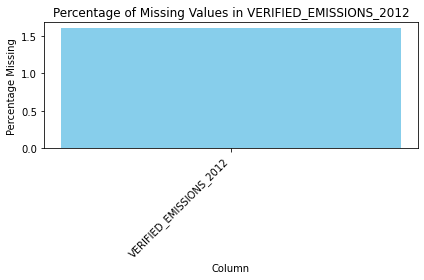

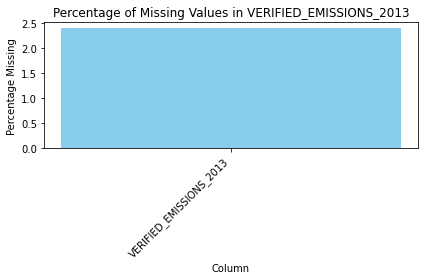

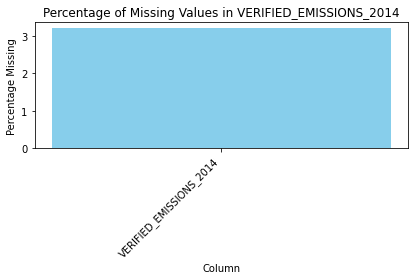

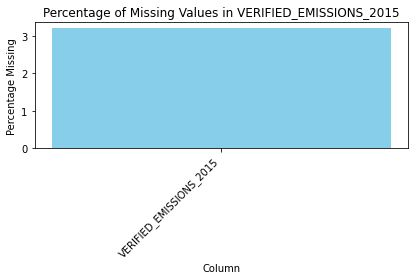

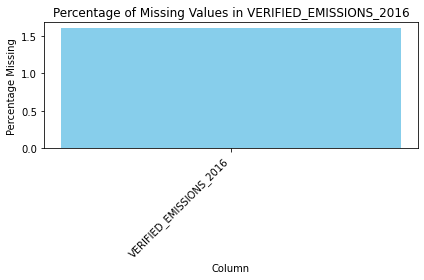

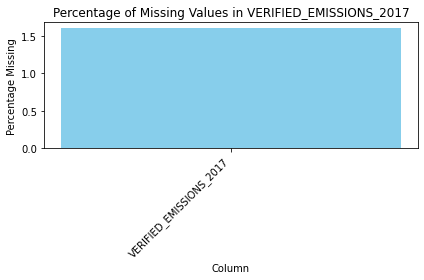

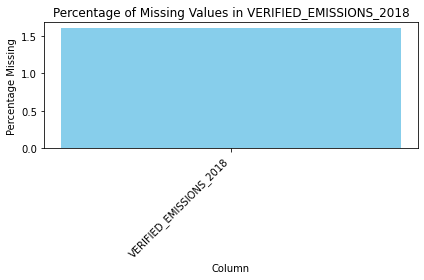

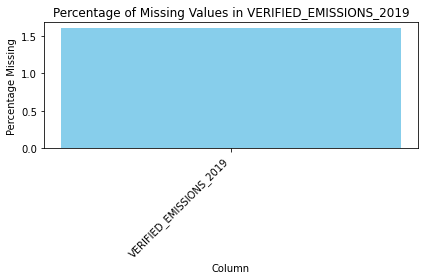

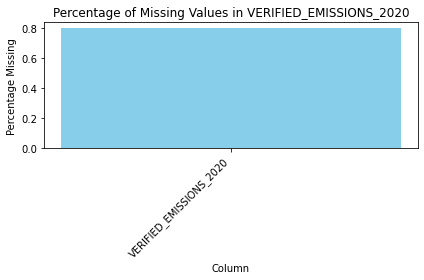

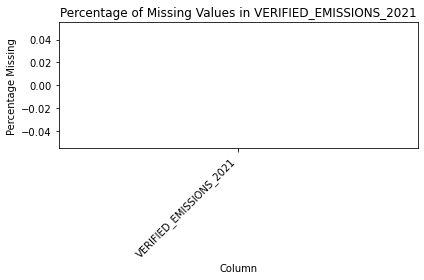

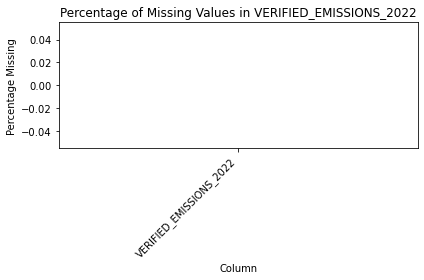

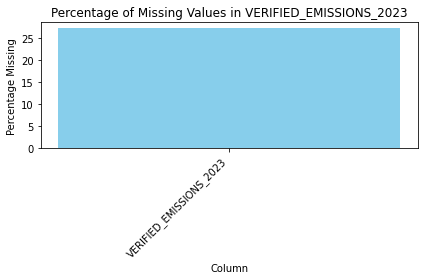

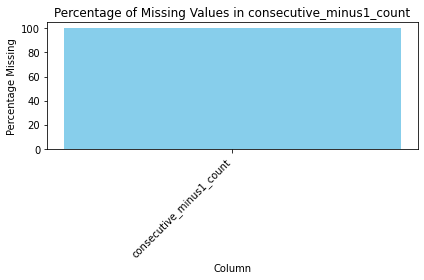

In [147]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == 0).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [148]:
# Iterate through each pair of consecutive columns
for i in range(1, len(new.columns)):
    current_col = targets.columns[i]
    next_col = new.columns[i + 1] if i + 1 < len(new.columns) else None
    
    if next_col is not None:
        # Identify rows where current_col has missing values (0)
        missing_indices = new[current_col] == 0
        
        # Impute missing values (-1) in current_col with values from next_col
        new.loc[missing_indices, current_col] = new.loc[missing_indices, next_col]

# Replace remaining -1 values with NaN if needed (optional)
new.replace(0, np.nan, inplace=True)

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
151,2565047.0,2567934.0,2490464.0,2530318.0,2592526.0,2826640.0,2713186.0,2804050.0,2784461.0,2738604.0,2824369.0,2791040.0,2731772.0,2749644.0,2255065.0,2579589.0,NaN
444,1666099.0,1839391.0,1798914.0,1937506.0,2028106.0,1742152.0,2017865.0,1957465.0,1932514.0,1883919.0,1994945.0,2093011.0,1905989.0,2196298.0,1919317.0,2182916.0,NaN
542,56029.0,59719.0,44310.0,42578.0,40141.0,34018.0,36192.0,35415.0,42796.0,39697.0,46383.0,46312.0,43978.0,39878.0,15673.0,10349.0,NaN
604,4021016.0,3776763.0,3985956.0,3261352.0,3566142.0,3645538.0,3621037.0,3780955.0,3719356.0,3676934.0,3643252.0,4004998.0,3627295.0,3788472.0,3712276.0,3282539.0,NaN
635,525496.0,525550.0,521974.0,539452.0,300749.0,537352.0,498625.0,493884.0,388655.0,451446.0,457012.0,471834.0,215021.0,14890.0,10515.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14164,157962.0,141734.0,159454.0,124254.0,122393.0,133652.0,137441.0,127611.0,141499.0,147379.0,145135.0,116474.0,106649.0,117388.0,112477.0,100999.0,NaN
14326,539306.0,496876.0,557207.0,473110.0,515636.0,510343.0,491235.0,532820.0,503504.0,461299.0,536000.0,570427.0,511723.0,526277.0,587105.0,479781.0,NaN
14327,1769903.0,1777932.0,1672852.0,1735310.0,1823198.0,1457376.0,1639901.0,1709050.0,1576765.0,1698054.0,1768630.0,1220342.0,1186464.0,1594959.0,1383877.0,1567625.0,NaN
14423,522275.0,492838.0,537926.0,485835.0,533969.0,470446.0,489173.0,465990.0,535225.0,522459.0,547101.0,456632.0,500033.0,506027.0,568991.0,477527.0,NaN


In [168]:
# Iterate through each column
for col in new.columns:
    # Identify rows where the value is NaN and not 0
    nan_indices = new[col].isnull()
    
    if any(nan_indices):
        # Impute NaN values with the previous non-NaN value in the same column
        new.loc[nan_indices, col] = new[col].fillna(method='ffill')


In [175]:
# Drop the last column by name ('consecutive_minus1_count')
new.drop('consecutive_minus1_count', axis=1, inplace=True)

new.shape

(125, 16)

In [177]:
# Convert all columns to int
new = new.astype(int)
new.head()

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539


In [180]:
# Count NaN values
num_nan = new.isna().sum().sum()

# Count values equal to 0 or -1
num_zero_or_neg1 = ((new == 0) | (new == -1)).sum().sum()

print(f"Number of NaN values: {num_nan}")
print(f"Number of values equal to 0 or -1: {num_zero_or_neg1}")

Number of NaN values: 0
Number of values equal to 0 or -1: 0


**==> Missing Values Handled**

<br><br><font color='#6BA9DA' size='4'>- Handling Outliers</font>

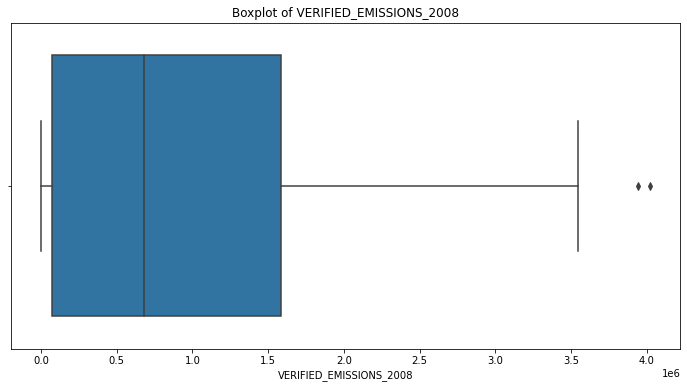

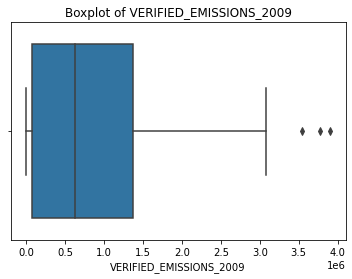

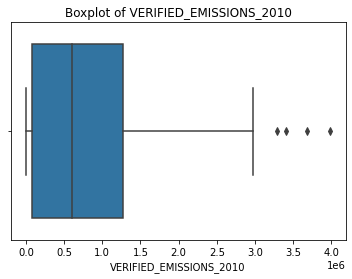

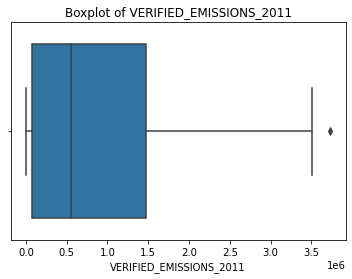

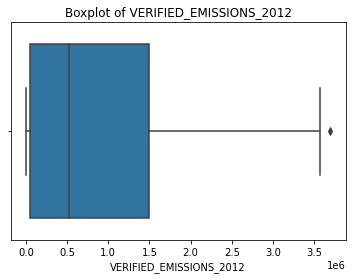

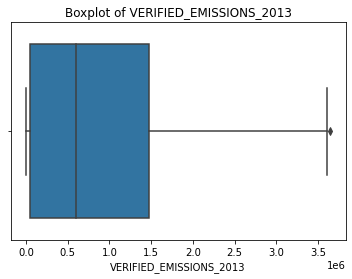

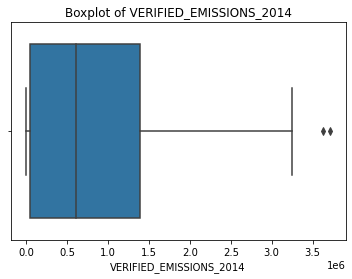

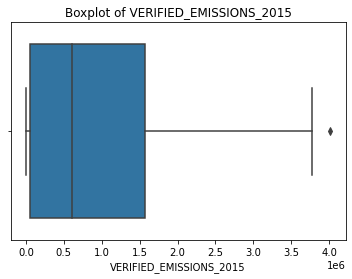

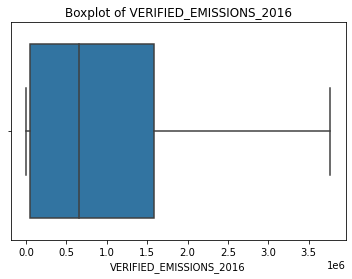

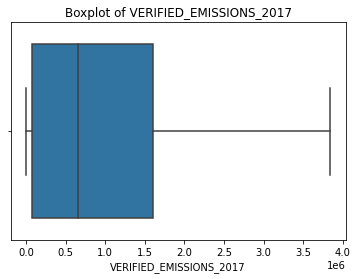

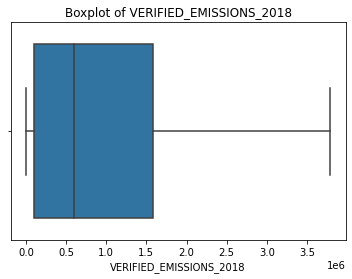

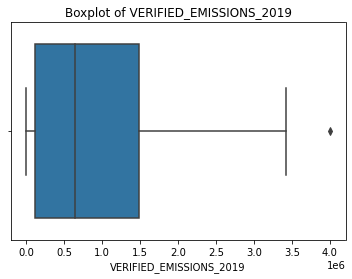

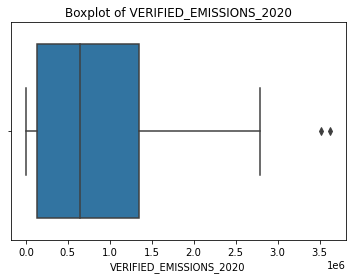

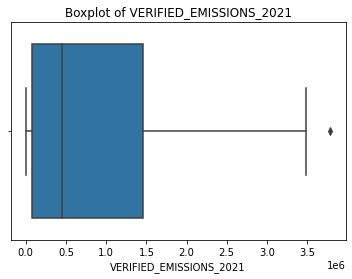

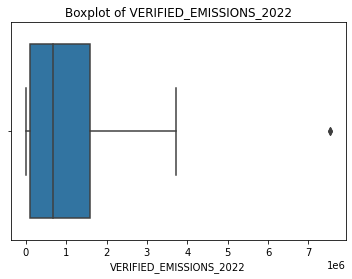

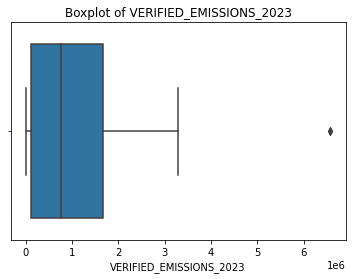

In [179]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each column (variable) in the dataset
for column in new.columns:
        # Create a boxplot for the variable
        sns.boxplot(x=new[column], orient='h')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

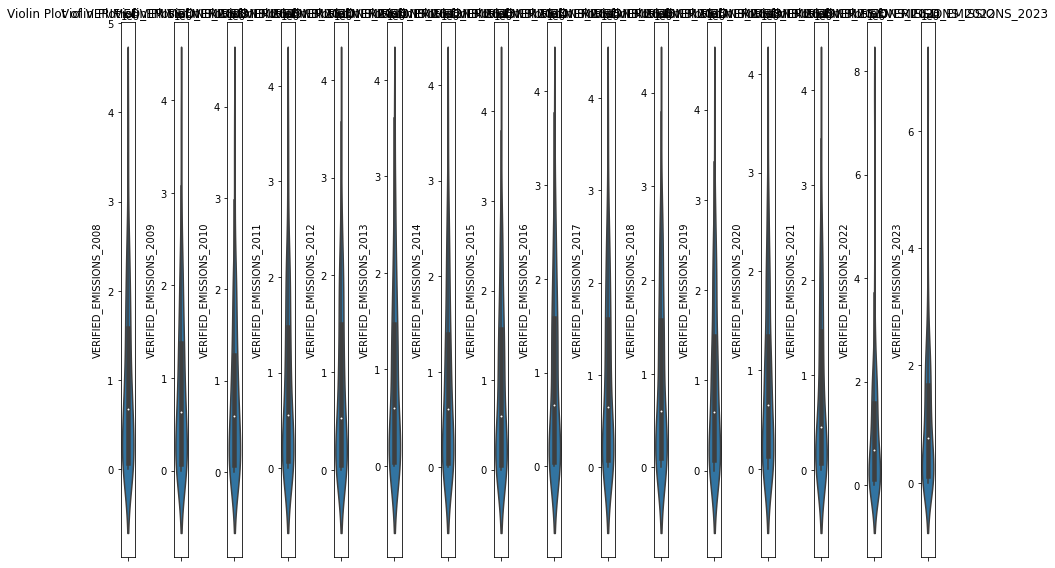

In [184]:
# Create violin plots for each column except the index
plt.figure(figsize=(12, 8))
for i, col in enumerate(new.columns):
    if new[col].dtype in ['int32']:  # Ensure column is numeric
        plt.subplot(1, len(new.columns), i + 1)
        sns.violinplot(y=new[col])
        plt.title(f'Violin Plot of {col}')
        plt.ylabel(col)
plt.tight_layout()
plt.show()

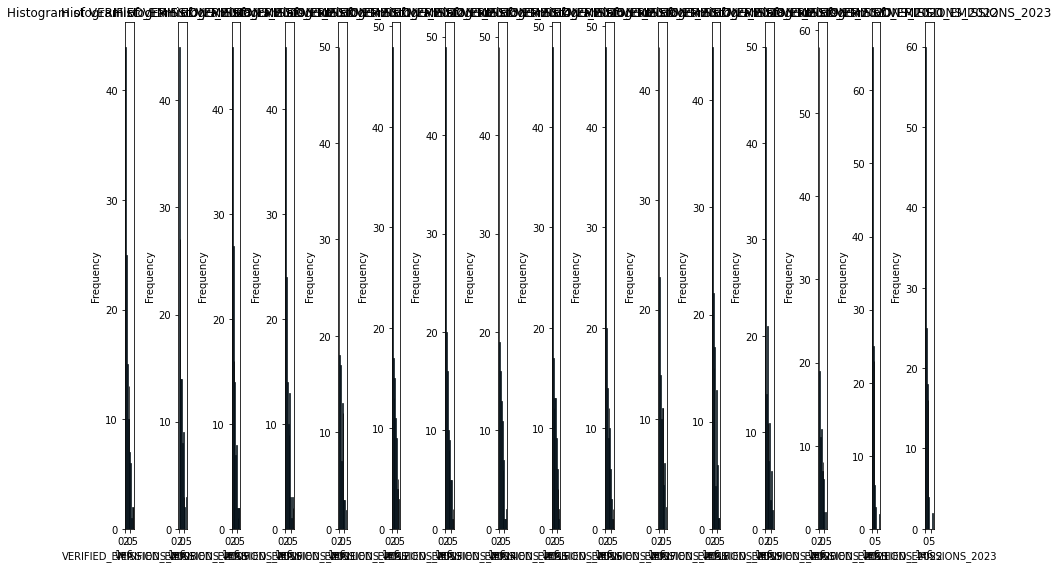

In [186]:
 # Get column names except for the index
columns = new.columns

# Create histograms for every column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    plt.hist(new[col], bins=10, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

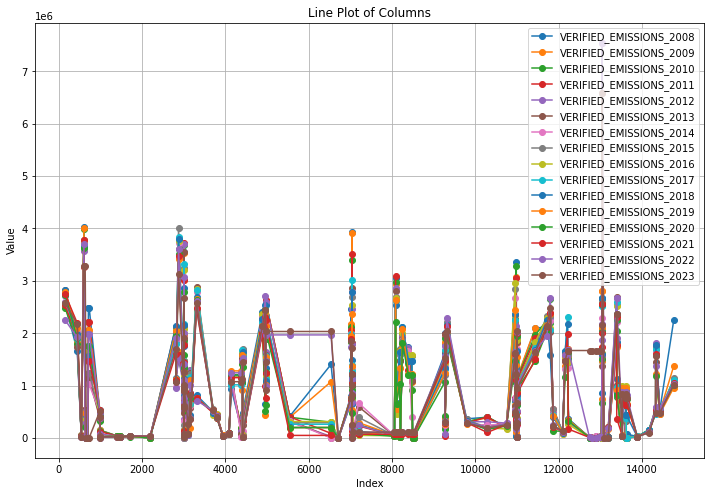

In [187]:
# Plotting lines for each column in 'new'
plt.figure(figsize=(12, 8))
for col in new.columns:
    plt.plot(new.index, new[col], marker='o', linestyle='-', label=col)

# Customize plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Columns')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
# Compute Z-scores for each column except for the index column
z_scores = new.apply(lambda x: (x - x.mean()) / x.std() if np.issubdtype(x.dtype, np.number) else x)

# Display the standardized dataset
z_scores

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,1.717882,1.901374,1.849799,1.856795,2.054824,2.100983,2.031651,2.025847,1.984449,1.908628,2.052043,2.040629,2.193351,2.223698,1.045087,1.410904
444,0.761795,1.079194,1.063911,1.191398,1.391076,0.915512,1.261231,1.113746,1.071170,0.998694,1.149481,1.272038,1.223011,1.591062,0.769938,1.057316
542,-0.950614,-0.929211,-0.930049,-0.935547,-0.946736,-0.951676,-0.934475,-0.957046,-0.954591,-0.964744,-0.970904,-0.981556,-0.964953,-0.874354,-0.790115,-0.879277
604,3.266396,3.265569,3.549299,2.677338,3.199780,2.996133,3.037556,3.078352,2.986648,2.907615,2.943134,3.377302,3.245639,3.411381,2.239284,2.037502
635,-0.451307,-0.403509,-0.387224,-0.377835,-0.640266,-0.401474,-0.422096,-0.463098,-0.583833,-0.526378,-0.524066,-0.513019,-0.763968,-0.902923,-0.794342,2.037502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14164,-0.842202,-0.836655,-0.799197,-0.843870,-0.850010,-0.842764,-0.822290,-0.857716,-0.848782,-0.850101,-0.863444,-0.904301,-0.891311,-0.785738,-0.710783,-0.798473
14326,-0.436619,-0.435868,-0.347184,-0.452300,-0.387563,-0.430997,-0.430284,-0.421148,-0.460716,-0.515888,-0.438113,-0.404460,-0.415327,-0.318258,-0.321821,-0.460833
14327,0.872197,1.009836,0.920652,0.964445,1.150108,0.604219,0.842445,0.846107,0.689810,0.800814,0.903210,0.311153,0.377530,0.903557,0.331141,0.508855
14423,-0.454733,-0.440425,-0.369096,-0.438017,-0.366003,-0.474610,-0.432569,-0.493150,-0.426712,-0.450775,-0.426033,-0.529758,-0.429063,-0.341410,-0.336666,-0.462842


,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539


In [202]:
# Identify rows with values greater than 3 in any column (excluding the index column)
outliers = z_scores[(z_scores > 3).any(axis=1)]

# Display the rows with outliers
print("Rows with values greater than 3 in any column (excluding index column):\n")
outliers

Rows with values greater than 3 in any column (excluding index column):



,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
604,3.266396,3.265569,3.549299,2.677338,3.199780,2.996133,3.037556,3.078352,2.986648,2.907615,2.943134,3.377302,3.245639,3.411381,2.239284,2.037502
2876,0.636975,0.856726,0.725524,0.794255,0.793613,2.948020,3.141341,3.331341,3.037179,3.084392,3.102763,2.731748,3.114685,3.058894,2.147697,1.895539
3002,2.760490,2.998843,3.207113,3.204465,3.351271,2.887797,2.622191,2.496975,2.438121,2.525854,2.088884,2.279781,2.260898,2.521443,1.719737,1.499669
7034,3.180544,3.409612,2.890460,2.951700,1.904243,2.131880,2.109116,1.905150,1.715782,2.196599,2.002517,1.581136,1.109352,1.145487,0.664921,0.647350
13039,1.173302,1.382451,1.316808,1.273684,1.561392,1.776040,1.553622,1.840388,1.740175,1.669254,1.876640,2.048785,2.000110,2.003007,5.380302,4.974561
13040,-1.005455,-0.996604,-0.980402,-0.983335,-0.993855,-0.988803,-0.974570,-0.995171,-1.000212,1.669254,1.876640,2.048785,2.000110,2.003007,5.380302,4.974561


In [203]:
# Identify common indices between 'new' and 'outliers'
common_indices = outliers.index

# Filter 'new' based on common indices
filtered_data = new[new.index.isin(common_indices)]

# Display the result
print("Rows from 'new' where index matches with 'outliers':\n")
filtered_data

Rows from 'new' where index matches with 'outliers':



,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
2876,1548738,1642259,1501147,1583685,1520052,3601523,3714705,4015772,3766493,3842978,3789945,3418710,3515850,3480163,3600518,3123277
3002,3545345,3540414,3684846,3730978,3694963,3546430,3246161,3241338,3207666,3318353,2858225,3008236,2789256,3010072,3078302,2679170
7034,3940295,3904402,3406204,3505785,2464479,2854905,2783100,2692023,2533836,3009090,2778856,2373732,1809262,1806568,1791170,1722996
13039,2053013,2108110,2021453,2010815,2172935,2529377,2281754,2631913,2556591,2513764,2663180,2798447,2567319,2556613,7545082,6577479
13040,4466,1,1,3,74,53,5,29,239,2513764,2663180,2798447,2567319,2556613,7545082,6577479


In [204]:
filtered_data.shape

(6, 16)

In [211]:
# Step 1: Reset the index and move it to the first column
filtered_data.reset_index(inplace=True)

# Step 2: Rename the column to 'identifier'
filtered_data.rename(columns={'index': 'identifier'}, inplace=True)

filtered_data

C:\Users\HP\AppData\Local\Temp\ipykernel_21508\39740936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'index': 'identifier'}, inplace=True)


,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
1,2876,1548738,1642259,1501147,1583685,1520052,3601523,3714705,4015772,3766493,3842978,3789945,3418710,3515850,3480163,3600518,3123277
2,3002,3545345,3540414,3684846,3730978,3694963,3546430,3246161,3241338,3207666,3318353,2858225,3008236,2789256,3010072,3078302,2679170
3,7034,3940295,3904402,3406204,3505785,2464479,2854905,2783100,2692023,2533836,3009090,2778856,2373732,1809262,1806568,1791170,1722996
4,13039,2053013,2108110,2021453,2010815,2172935,2529377,2281754,2631913,2556591,2513764,2663180,2798447,2567319,2556613,7545082,6577479
5,13040,4466,1,1,3,74,53,5,29,239,2513764,2663180,2798447,2567319,2556613,7545082,6577479


In [212]:

# Step 1: Locate the row with index 5
row = filtered_data.loc[5]

# Step 2: Select the last 7 columns
last_7_columns = row.iloc[-7:]

# Step 3: Calculate the average
average_last_7 = last_7_columns.mean()

print(f"The average of the last 7 columns for row with index 13040 is: {average_last_7}")


The average of the last 7 columns for row with index 13040 is: 3888840.5714285714


In [214]:
# Step 1: Replace columns 2nd to 10th (1st to 9th index in Python)
average_last_7 =3888840
row_index = 5  # Replace with your actual row index
filtered_data.iloc[row_index, 1:10] = average_last_7

# Print the updated DataFrame to verify changes
filtered_data

,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,604,4021016.0,3776763.0,3985956.0,3261352.0,3566142.0,3645538.0,3621037.0,3780955.0,3719356.0,3676934,3643252,4004998,3627295,3788472,3712276,3282539
1,2876,1548738.0,1642259.0,1501147.0,1583685.0,1520052.0,3601523.0,3714705.0,4015772.0,3766493.0,3842978,3789945,3418710,3515850,3480163,3600518,3123277
2,3002,3545345.0,3540414.0,3684846.0,3730978.0,3694963.0,3546430.0,3246161.0,3241338.0,3207666.0,3318353,2858225,3008236,2789256,3010072,3078302,2679170
3,7034,3940295.0,3904402.0,3406204.0,3505785.0,2464479.0,2854905.0,2783100.0,2692023.0,2533836.0,3009090,2778856,2373732,1809262,1806568,1791170,1722996
4,13039,2053013.0,2108110.0,2021453.0,2010815.0,2172935.0,2529377.0,2281754.0,2631913.0,2556591.0,2513764,2663180,2798447,2567319,2556613,7545082,6577479
5,13040,3888840.0,3888840.0,3888840.0,3888840.0,3888840.0,3888840.0,3888840.0,3888840.0,3888840.0,2513764,2663180,2798447,2567319,2556613,7545082,6577479


**==> Large Outliers dealth with**

In [226]:
# Find rows where the difference between any two values is larger than 0.5
diff_threshold = 0.5
outliers = outliers[(np.abs(outliers.diff(axis=1)) > diff_threshold).any(axis=1)]

# Print the rows with differences larger than 0.5
outliers

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
635,-0.451307,-0.403509,-0.387224,-0.377835,-0.640266,-0.401474,-0.422096,-0.463098,-0.583833,-0.526378,-0.524066,-0.513019,-0.763968,-0.902923,-0.794342,2.037502
713,1.638320,0.306211,0.248008,1.507695,0.277881,0.257809,0.160976,0.332167,0.761149,0.872906,0.674154,1.233190,1.052982,0.767010,0.829792,-0.881989
731,1.638320,0.306211,0.248008,1.507695,0.277881,0.257809,0.160976,0.332167,0.761149,0.872906,0.674154,1.233190,1.052982,0.767010,0.829792,-0.881989
3014,-0.063339,-0.275429,-0.822580,-0.904909,-0.990903,-0.986418,-0.972100,-0.994907,0.238226,0.028287,0.196207,0.155968,0.214529,0.300369,0.076370,-0.053307
4386,-0.819919,-0.778257,-0.771863,-0.831201,-0.828628,-0.897942,-0.944452,0.272793,0.248899,0.074320,0.285896,0.378570,0.401099,0.397507,0.216967,0.069967
5546,-0.566655,-0.550743,-0.529485,-0.528148,-0.632894,-0.616532,-0.617455,-0.680689,-0.663537,-0.726608,-0.802179,-0.812042,-0.781858,-0.862727,0.809802,0.924063
6535,0.484528,0.217125,-0.637990,-0.884360,-0.958693,-0.983183,-0.972220,-0.680689,-0.663537,-0.726608,-0.802179,-0.812042,-0.781858,-0.862727,0.809802,0.924063
7030,0.575857,0.479959,0.443794,0.385126,0.528342,0.140149,0.405190,0.188150,0.221134,0.358614,0.308676,0.097620,0.056645,-0.760937,-0.233676,-0.151102
7035,0.293233,0.541965,0.393431,0.435422,0.413490,0.317617,0.077701,0.109506,0.368150,-0.947891,-0.994777,-0.793627,-0.749462,-0.634121,-0.639005,-0.661297
8084,2.230113,2.312768,2.399965,2.484774,2.373398,2.086524,2.004409,1.913922,1.868225,1.786902,1.731812,1.875039,1.576621,-0.837248,-0.714087,-0.787581


In [259]:
# Identify common indices between 'new' and 'outliers'
common_indices = outliers.index

# Filter 'new' based on common indices
filtered_data = new[new.index.isin(common_indices)]

# Remove duplicate rows based on all columns
filtered_data = filtered_data.drop_duplicates()

# Display the result
print("Rows from 'new' where index matches with 'outliers':\n")
filtered_data

Rows from 'new' where index matches with 'outliers':



,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539
713,2490239,1154441,1080952,2219299,1081498,1140474,1024860,1232026,1643313,1765769,1558136,2057729,1761290,1475526,1992353,7307
3014,890278,639043,138878,69874,2584,2235,2234,274,1155508,972433,1118918,1079404,1047746,1067370,1072995,936964
4386,178914,193481,183507,135541,140575,83175,27187,1176916,1165464,1015671,1201340,1281569,1206522,1152334,1244557,1075259
5546,417042,395084,396790,405536,307018,340613,322309,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
6535,1405402,1075501,301310,88181,29974,5195,2126,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
7030,1491273,1308401,1253236,1219186,1294478,1032837,1245269,1098353,1139564,1282703,1222274,1026412,913383,139080,694663,827252
7035,1225540,1363346,1208919,1263995,1196813,1195188,949703,1025358,1276707,55527,24444,216988,227366,250002,200064,254890
8084,3046665,2932475,2974588,3089794,2863426,2813413,2688599,2700165,2676042,2624269,2530088,2640652,2206920,72334,108445,113218
8178,1692245,1684129,1487237,1654662,1590638,1471340,1335507,1595534,1654388,1638305,1638115,1342946,1035660,72334,108445,113218


As the data is small enough, we'll deal with outliers manually focusing on the target variable which is 2023 emissions.

In [260]:
# Step 1: Reset the index and move it to the first column
filtered_data.reset_index(inplace=True)

# Step 2: Rename the column to 'identifier'
filtered_data.rename(columns={'index': 'identifier'}, inplace=True)

filtered_data

,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539
1,713,2490239,1154441,1080952,2219299,1081498,1140474,1024860,1232026,1643313,1765769,1558136,2057729,1761290,1475526,1992353,7307
2,3014,890278,639043,138878,69874,2584,2235,2234,274,1155508,972433,1118918,1079404,1047746,1067370,1072995,936964
3,4386,178914,193481,183507,135541,140575,83175,27187,1176916,1165464,1015671,1201340,1281569,1206522,1152334,1244557,1075259
4,5546,417042,395084,396790,405536,307018,340613,322309,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
5,6535,1405402,1075501,301310,88181,29974,5195,2126,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
6,7030,1491273,1308401,1253236,1219186,1294478,1032837,1245269,1098353,1139564,1282703,1222274,1026412,913383,139080,694663,827252
7,7035,1225540,1363346,1208919,1263995,1196813,1195188,949703,1025358,1276707,55527,24444,216988,227366,250002,200064,254890
8,8084,3046665,2932475,2974588,3089794,2863426,2813413,2688599,2700165,2676042,2624269,2530088,2640652,2206920,72334,108445,113218
9,8178,1692245,1684129,1487237,1654662,1590638,1471340,1335507,1595534,1654388,1638305,1638115,1342946,1035660,72334,108445,113218


In [261]:
# Convert all columns to float
filtered_data = filtered_data.astype(float)


In [262]:
# Calculate average of the second row excluding the last column
row_average = filtered_data.iloc[1, :-1].mean()

# Substitute the last column of the second row with the calculated average
filtered_data.iloc[1, -1] = row_average

# Print the updated dataset to verify
filtered_data

,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,635.0,525496.0,525550.0,521974.0,539452.0,300749.0,537352.0,498625.0,493884.0,388655.0,451446.0,457012.0,471834.0,215021.0,14890.0,10515.0,3282539.000
1,713.0,2490239.0,1154441.0,1080952.0,2219299.0,1081498.0,1140474.0,1024860.0,1232026.0,1643313.0,1765769.0,1558136.0,2057729.0,1761290.0,1475526.0,1992353.0,1479913.625
2,3014.0,890278.0,639043.0,138878.0,69874.0,2584.0,2235.0,2234.0,274.0,1155508.0,972433.0,1118918.0,1079404.0,1047746.0,1067370.0,1072995.0,936964.000
3,4386.0,178914.0,193481.0,183507.0,135541.0,140575.0,83175.0,27187.0,1176916.0,1165464.0,1015671.0,1201340.0,1281569.0,1206522.0,1152334.0,1244557.0,1075259.000
4,5546.0,417042.0,395084.0,396790.0,405536.0,307018.0,340613.0,322309.0,291922.0,314304.0,263374.0,201435.0,200263.0,199796.0,50048.0,1967960.0,2033426.000
5,6535.0,1405402.0,1075501.0,301310.0,88181.0,29974.0,5195.0,2126.0,291922.0,314304.0,263374.0,201435.0,200263.0,199796.0,50048.0,1967960.0,2033426.000
6,7030.0,1491273.0,1308401.0,1253236.0,1219186.0,1294478.0,1032837.0,1245269.0,1098353.0,1139564.0,1282703.0,1222274.0,1026412.0,913383.0,139080.0,694663.0,827252.000
7,7035.0,1225540.0,1363346.0,1208919.0,1263995.0,1196813.0,1195188.0,949703.0,1025358.0,1276707.0,55527.0,24444.0,216988.0,227366.0,250002.0,200064.0,254890.000
8,8084.0,3046665.0,2932475.0,2974588.0,3089794.0,2863426.0,2813413.0,2688599.0,2700165.0,2676042.0,2624269.0,2530088.0,2640652.0,2206920.0,72334.0,108445.0,113218.000
9,8178.0,1692245.0,1684129.0,1487237.0,1654662.0,1590638.0,1471340.0,1335507.0,1595534.0,1654388.0,1638305.0,1638115.0,1342946.0,1035660.0,72334.0,108445.0,113218.000


**same process fot the rest rows including outliers**

In [ ]:
# 
row_average = filtered_data.iloc[16, :-1].mean()

# 
filtered_data.iloc[16, -1] = row_average

In [264]:
# 
row_average = filtered_data.iloc[17, :-1].mean()

# 
filtered_data.iloc[17, -1] = row_average

In [265]:
# 
row_average = filtered_data.iloc[18, :-1].mean()

# 
filtered_data.iloc[18, -1] = row_average

In [266]:
# 
row_average = filtered_data.iloc[-1, :-1].mean()

# 
filtered_data.iloc[-1, -1] = row_average

In [268]:
# 
filtered_data = filtered_data.astype(int)
filtered_data

,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539
1,713,2490239,1154441,1080952,2219299,1081498,1140474,1024860,1232026,1643313,1765769,1558136,2057729,1761290,1475526,1992353,1479913
2,3014,890278,639043,138878,69874,2584,2235,2234,274,1155508,972433,1118918,1079404,1047746,1067370,1072995,936964
3,4386,178914,193481,183507,135541,140575,83175,27187,1176916,1165464,1015671,1201340,1281569,1206522,1152334,1244557,1075259
4,5546,417042,395084,396790,405536,307018,340613,322309,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
5,6535,1405402,1075501,301310,88181,29974,5195,2126,291922,314304,263374,201435,200263,199796,50048,1967960,2033426
6,7030,1491273,1308401,1253236,1219186,1294478,1032837,1245269,1098353,1139564,1282703,1222274,1026412,913383,139080,694663,827252
7,7035,1225540,1363346,1208919,1263995,1196813,1195188,949703,1025358,1276707,55527,24444,216988,227366,250002,200064,254890
8,8084,3046665,2932475,2974588,3089794,2863426,2813413,2688599,2700165,2676042,2624269,2530088,2640652,2206920,72334,108445,113218
9,8178,1692245,1684129,1487237,1654662,1590638,1471340,1335507,1595534,1654388,1638305,1638115,1342946,1035660,72334,108445,113218


In [269]:
new.head()

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539


In [270]:
# Step 1: Reset the index and move it to the first column
new.reset_index(inplace=True)

# Step 2: Rename the column to 'identifier'
new.rename(columns={'index': 'identifier'}, inplace=True)

,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
1,444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
2,542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
3,604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
4,635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539


In [271]:
# Concatenate the DataFrames
new = pd.concat([filtered_data, new], ignore_index=True)
new.head()


,identifier,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
0,635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,3282539
1,713,2490239,1154441,1080952,2219299,1081498,1140474,1024860,1232026,1643313,1765769,1558136,2057729,1761290,1475526,1992353,1479913
2,3014,890278,639043,138878,69874,2584,2235,2234,274,1155508,972433,1118918,1079404,1047746,1067370,1072995,936964
3,4386,178914,193481,183507,135541,140575,83175,27187,1176916,1165464,1015671,1201340,1281569,1206522,1152334,1244557,1075259
4,5546,417042,395084,396790,405536,307018,340613,322309,291922,314304,263374,201435,200263,199796,50048,1967960,2033426


<br><br><font color='#6BA9DA' size='4'>- Handling duplicates</font>

In [272]:
# Remove duplicate rows based on all columns
new = new.drop_duplicates()

<font color='#54555A' size='5'>**Modeling** </font>

I am going to descrip to you my dataset: It has information on different factories's CO2 emissions, the first column is the identifier of every factory the rest are columns representing CO2 emissions from 2008, 2009.. 2023. I would like to build a  regression model that predicts umcoming years' emissions for different factories. the train ata is all the data except 2023's, I intend to leave it as a target variable to test and validate my model. my dataset's name is 'new', the columns are 'identifier', 'VERIFIED_EMISSIONS_2008', 'VERIFIED_EMISSIONS_2009',..,'VERIFIED_EMISSIONS_2023'. Walk me through the steps and give me the code.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [310]:
new = new.astype(float)


In [311]:
# Extract predictor variables (emissions from 2008 to 2022) and target variable (emissions in 2023)
predictors = new[['VERIFIED_EMISSIONS_2008', 'VERIFIED_EMISSIONS_2009', 'VERIFIED_EMISSIONS_2010',
                  'VERIFIED_EMISSIONS_2011', 'VERIFIED_EMISSIONS_2012', 'VERIFIED_EMISSIONS_2013',
                  'VERIFIED_EMISSIONS_2014', 'VERIFIED_EMISSIONS_2015', 'VERIFIED_EMISSIONS_2016',
                  'VERIFIED_EMISSIONS_2017', 'VERIFIED_EMISSIONS_2018', 'VERIFIED_EMISSIONS_2019',
                  'VERIFIED_EMISSIONS_2020', 'VERIFIED_EMISSIONS_2021', 'VERIFIED_EMISSIONS_2022']]
target = new['VERIFIED_EMISSIONS_2023']

In [340]:
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [341]:
# Step 3: Choose a Regression Model 
model = LinearRegression()

In [342]:
# Step 4: Train the Regression Model
model.fit(X_train, y_train)

LinearRegression()

In [343]:
# Step 5: Evaluate the Model
# Predict emissions for 2023 using the trained model
y_pred = model.predict(X_test)

In [344]:
# Create a DataFrame to display predicted and actual values
comparison_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

comparison_df = comparison_df.astype(int)


In [345]:
# Display the DataFrame
comparison_df

,Actual Values,Predicted Values
57,355070,623537
41,1071986,928982
19,1670350,185136
32,517141,609996
133,2359568,2181930
58,2569583,2231386
72,2033426,2031126
119,135905,272242
90,113218,269385
26,3282539,3413145


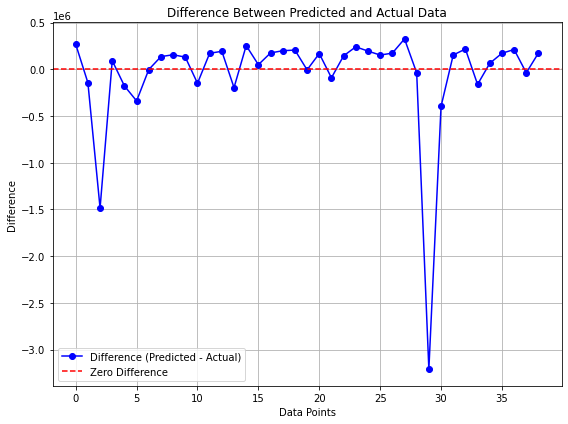

In [346]:
# Calculate the difference between predicted and actual values
difference = [pred - actual for pred, actual in zip(y_pred, y_test)]

# Plotting the difference
plt.figure(figsize=(8, 6))
plt.plot(difference, marker='o', linestyle='-', color='b', label='Difference (Predicted - Actual)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5, label='Zero Difference')
plt.xlabel('Data Points')
plt.ylabel('Difference')
plt.title('Difference Between Predicted and Actual Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [348]:
# Calculate Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")



Mean Squared Error (MSE): 354186638974.2354
